In [3]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI

In [4]:
seed = 42
np.random.seed(seed)     # Fix random seed
def lin_f(x): return x
links_coeffs = {0: [((0, -1), 0.7, lin_f), ((1, -1), -0.8, lin_f)],
                1: [((1, -1), 0.8, lin_f), ((3, -1), 0.8, lin_f)],
                2: [((2, -1), 0.5, lin_f), ((1, -2), 0.5, lin_f), ((3, -3), 0.6, lin_f)],
                3: [((3, -1), 0.4, lin_f)],
                }
T = 1000     # time series length
data, _ = toys.structural_causal_process(links_coeffs, T=T, seed=seed)
T, N = data.shape

# Initialize dataframe object, specify time axis and variable names
var_names = [r'$X^0$', r'$X^1$', r'$X^2$', r'$X^3$']
dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)

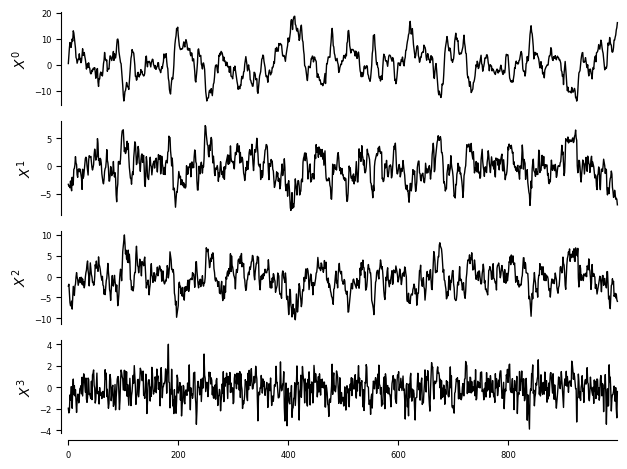

In [6]:
tp.plot_timeseries(dataframe); plt.show()

In [7]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


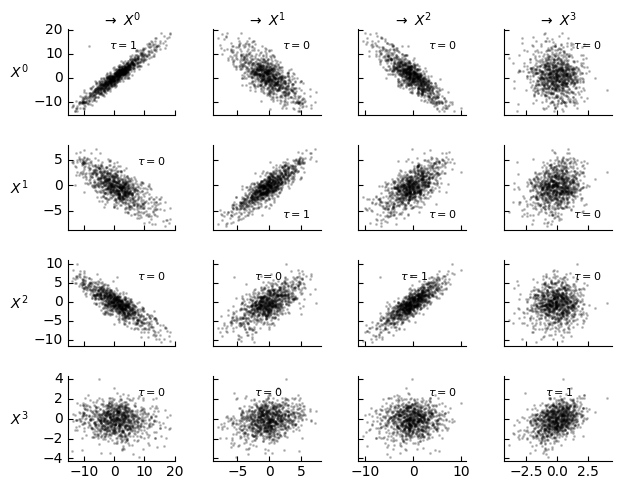

In [8]:
matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()

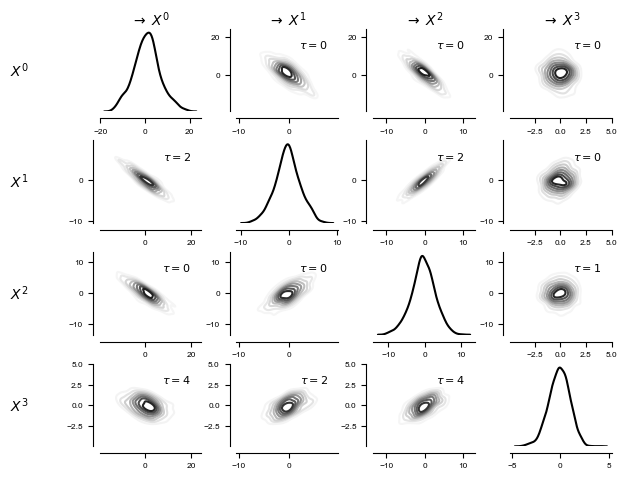

In [11]:
tp.plot_densityplots(dataframe=dataframe, add_densityplot_args={'matrix_lags':matrix_lags})
plt.show()

In [12]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


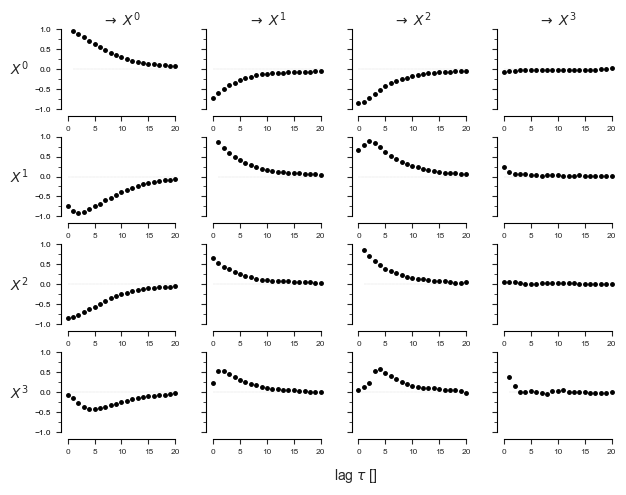

In [13]:
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()

In [14]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=8, pc_alpha=None, alpha_level=0.01)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable $X^0$ has 5 link(s):
    [pc_alpha = 0.1]
        ($X^0$ -1): max_pval = 0.00000, |min_val| =  0.816
        ($X^1$ -1): max_pval = 0.00000, |min_val| =  0.729
        ($X^3$ -4): max_pval = 0.04439, |min_val| =  0.064
        ($X^2$ -5): max_pval = 0.06669, |min_val| =  0.059
        ($X^3$ -1): max_pval = 0.08886, |min_val| =  0.054

    Variable $X^1$ has 2 link(s):
    [pc_alpha = 0.05]
        ($X^1$ -1): max_pval = 0.00000, |min_val| =  0.700
        ($X^3$ -1): max_pval = 0.00000, |min_val| =  0.522

    Variable $X^2$ has 3 link(s):
    [pc_alpha = 0.1]
        ($X^2$ -1): max_pval = 0.00000, |min_val| =  0.450
        ($X^1$ -2): max_pval = 0.00000, |min_val| =  0.429
        ($X^3$ -3): max_pval = 0.00000, |m

In [15]:
print("p-values")
print (results['p_matrix'].round(3))
print("MCI partial correlations")
print (results['val_matrix'].round(2))

p-values
[[[1.    0.    0.552 0.504 0.935 0.954 0.59  0.699 0.095]
  [0.434 0.389 0.769 0.14  0.643 0.155 0.148 0.15  0.675]
  [0.97  0.191 0.846 0.441 0.688 0.815 0.736 0.066 0.765]
  [0.185 0.761 0.643 0.078 0.262 0.176 0.535 0.757 0.282]]

 [[0.434 0.    0.844 0.629 0.566 0.83  0.265 0.62  0.921]
  [1.    0.    0.324 0.885 0.074 0.17  0.861 0.639 0.766]
  [0.425 0.654 0.    0.478 0.663 0.202 0.34  0.618 0.359]
  [0.354 0.276 0.909 0.097 0.981 0.617 0.882 0.947 0.654]]

 [[0.97  0.986 0.887 0.16  0.794 0.065 0.555 0.563 0.024]
  [0.425 0.048 0.752 0.759 0.846 0.314 0.63  0.763 0.876]
  [1.    0.    0.474 0.664 0.371 0.991 0.647 0.874 0.336]
  [0.306 0.721 0.473 0.861 0.97  0.143 0.569 0.931 0.123]]

 [[0.185 0.119 0.851 0.775 0.029 0.449 0.782 0.552 0.322]
  [0.354 0.    0.548 0.087 0.651 0.894 0.046 0.898 0.407]
  [0.306 0.341 0.756 0.    0.389 0.226 0.819 0.336 0.566]
  [1.    0.    0.277 0.07  0.316 0.616 0.43  0.677 0.023]]]
MCI partial correlations
[[[ 0.    0.56  0.02  0.02  0.

In [16]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=8, fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)
graph = pcmci.get_graph_from_pmatrix(p_matrix=q_matrix, alpha_level=0.01, 
            tau_min=0, tau_max=8, link_assumptions=None)
results['graph'] = graph


## Significant links at alpha = 0.01:

    Variable $X^0$ has 2 link(s):
        ($X^1$ -1): pval = 0.00000 | val = -0.619
        ($X^0$ -1): pval = 0.00000 | val =  0.559

    Variable $X^1$ has 2 link(s):
        ($X^3$ -1): pval = 0.00000 | val =  0.638
        ($X^1$ -1): pval = 0.00000 | val =  0.628

    Variable $X^2$ has 3 link(s):
        ($X^3$ -3): pval = 0.00000 | val =  0.452
        ($X^1$ -2): pval = 0.00000 | val =  0.429
        ($X^2$ -1): pval = 0.00000 | val =  0.422

    Variable $X^3$ has 1 link(s):
        ($X^3$ -1): pval = 0.00000 | val =  0.350


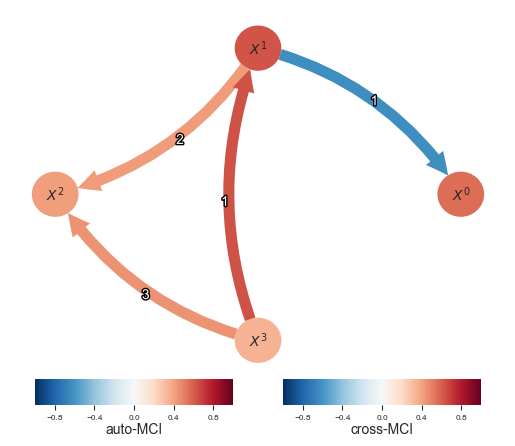

In [17]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()

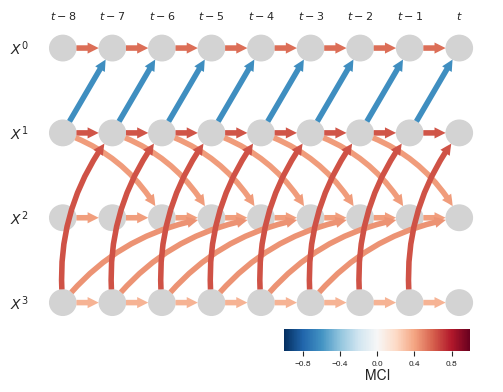

In [18]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()